PoliLib has a very old system to store its information. Every time that a book is borrowed, a librarian manually fills a new line of a text file borrowed_books.txt, writing a comma-separated string that contains four fields.

The schema is: book_title, first_name, last_name, borrow_date. Only when the book is returned, the librarian finds the related line in the file and adds one field that contains the return_date.

Example:

`The old man and the sea, Mario, De Rossi, 10-04-2023, 17-04-2023 `

`The old man and the sea, Alice, Bianchi, 20-04-2023, 27-04-2023 `

`Gulliver's Travels, Mario, De Rossi, 30-04-2023`

`Divina Commedia, Laura, Verdi Chiari, 26-04-2023, 01-05-2023 `

`Divina Commedia, Michael, Zu, 02-05-2023`

`The old man and the sea, Michael, Zu, 02-05-2023, 07-05-2023`

For simplicity, we here make the assumption that in PoliLib there does not exist more than one book with a given title, and that titles/first
names/last names do not contain commas.
#### 1) [5pts]
 Write a Python code that acquires the information from the file borrowed_books.txt and stores it within a dictionary where keys are titles and values are lists of lists (each with first name, last name, borrow date, return date if available, else a None value).

In [2]:


with open('borrowed_books.txt', 'w') as file:
    content=(f"The old man and the sea, Mario, De Rossi, 10-04-2023, 17-04-2023\n The old man and the sea, Alice, Bianchi, 20-04-2023,27-04-2023\n Gulliver's Travels, Mario, De Rossi, 30-04-2023\n Divina Commedia,Laura, Verdi Chiari, 26-04-2023, 01-05-2023\n Divina Commedia, Michael, Zu, 02-05-2023\n The old man and the sea, Michael, Zu, 02-05-2023, 07-05-2023\n")
    file.write(content)



with open('borrowed_books.txt', 'r') as f:
    total_list= [line.strip().split(',') for line in f ]
    total_list=[[element.strip() for element in line]for line in total_list ]
    poli_dection={}
    for line in total_list:
        if len(line)<5:
            line.append(None)
    for line in total_list:
        if line[0] not in poli_dection:
            poli_dection[line[0]]=[line[1:]]
        else:
            poli_dection[line[0]].append(line[1:])

poli_dection

{'The old man and the sea': [['Mario', 'De Rossi', '10-04-2023', '17-04-2023'],
  ['Alice', 'Bianchi', '20-04-2023', '27-04-2023'],
  ['Michael', 'Zu', '02-05-2023', '07-05-2023']],
 "Gulliver's Travels": [['Mario', 'De Rossi', '30-04-2023', None]],
 'Divina Commedia': [['Laura', 'Verdi Chiari', '26-04-2023', '01-05-2023'],
  ['Michael', 'Zu', '02-05-2023', None]]}

#### 2) [5pts]
 Write a Python function books_of_user that accepts a first name and last name as input, finds all the entries related to that person and returns them
 as a list of lists `<title>,<borrow_date>,<return_date>`.

In [144]:
def book_of_user(name,last_name):
    name=name.strip()
    last_name=last_name.strip()
    user_list=[]
    for title, info in poli_dection.items():
        for row in info:
            if name in row and last_name in row:
                user_list.append([title]+row[2:])
    return user_list



book_of_user(' Mario',' De Rossi')

[['The old man and the sea', '10-04-2023', '17-04-2023'],
 ["Gulliver's Travels", '30-04-2023', None]]

#### 3) [4pts]
Write a Python function books_after that accepts a date as input and returns a list of the titles of all the books that were borrowed after that date
and have not been returned yet.

In [145]:
from datetime import datetime

def books_after(date):
    try:
        datetime.strptime(date, '%d-%m-%Y')
        title_list=[ ky for ky,vl in poli_dection.items() for row in vl  if row[2]>date and row[3]==None ]
        return title_list
    except ValueError as e:
        print(e)

books_after('09-04-2021')


["Gulliver's Travels"]

#### 4) [4pts]
Write a Python function no_overbooking that accepts a title in input and checks that the corresponding book is not currently borrowed by more than one
user, throwing an appropriate Exception. Solutions that use list comprehension are preferred.

In [146]:
class OverBooked(Exception):
    def __init__(self, message):
        self.message = message
    def __str__(self):
        return self.message

def no_overbooking(title):
    check=[True for row in poli_dection[title] if row[3]==None]
    if len(check)>1:
        raise OverBooked ('book has been overbooked')
    else:
        return 'No overbooking occured'


no_overbooking('Divina Commedia')


'No overbooking occured'

#### 5) [4pts]
 Write a Python function barplot_user_loans to draw a bar plot of the number of borrowed books per distinct user.

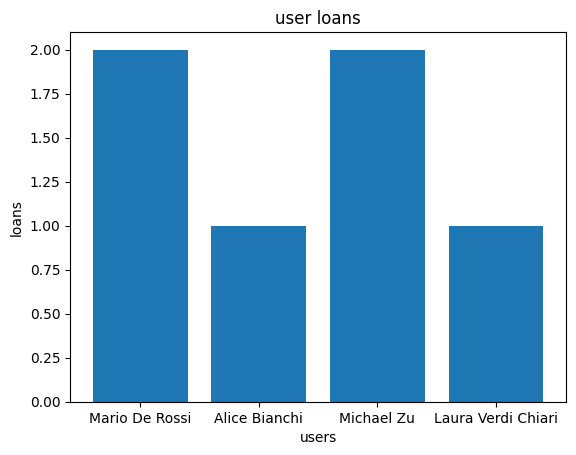

In [156]:
import matplotlib.pyplot as plt

def barplot_user_loans():
    distinct_users={f'{row[0]} {row[1]}':len(book_of_user(row[0],row[1])) for info in poli_dection.values() for row in info }
    x= [ky for ky in distinct_users.keys()]
    y= [vl for vl in distinct_users.values()]
    plt.bar(x,y)
    plt.title('user loans')
    plt.xlabel('users')
    plt.ylabel('loans')
    plt.show()

barplot_user_loans()


#### 7) [5pts]
Describe and sketch how you could implement PoliLib has a Python class (and subordinate classes) with their methods. Use all the information in the
intro and previous exercises to formulate a complete answer. What would be represented as a class? What methods would you add? Can you think of
additional functionalities? Consider for example that the librarian could have made some errors when compiling the file or that there may be
inconsistencies between reality and its representation in the system.

🧠 Extra Functionalities You Could Mention:

`Method to return a book (set return date).`

`Check for inconsistent dates (e.g., return before borrow).`

Validate unique users or book titles.

Method to list all currently borrowed books.

Support for persistent storage (load/save).`

In [5]:
#GPT version
from datetime import datetime

class OverBooked(Exception):
    pass

class PoliLib:
    def __init__(self):
        # Dictionary: title → list of [first, last, borrow, return]
        self.records = {}

    def add_book_loan(self, title, first, last, borrow_date, return_date=None):
        entry = [first, last, borrow_date, return_date]
        if title in self.records:
            self.records[title].append(entry)
        else:
            self.records[title] = [entry]

    def books_after(self, date_str):
        try:
            ref_date = datetime.strptime(date_str, "%d-%m-%Y")
        except ValueError:
            print("Date must be in DD-MM-YYYY format")
            return []

        result = []
        for title, loans in self.records.items():
            for loan in loans:
                borrow_date = datetime.strptime(loan[2], "%d-%m-%Y")
                if loan[3] is None and borrow_date > ref_date:
                    result.append(title)
        return result

    def no_overbooking(self, title):
        if title not in self.records:
            return True  # No records = no overbooking
        active_loans = [1 for loan in self.records[title] if loan[3] is None]
        if len(active_loans) > 1:
            raise OverBooked(f"Book '{title}' is overbooked.")
        return True

    def books_of_user(self, first, last):
        result = []
        for title, loans in self.records.items():
            for loan in loans:
                if loan[0] == first and loan[1] == last:
                    result.append([title] + loan[2:])
        return result

    def load_from_file(self, path):
        with open(path, 'r') as f:
            for line in f:
                parts = [p.strip() for p in line.strip().split(',')]
                if len(parts) < 5:
                    parts.append(None)
                title, first, last, borrow, ret = parts
                self.add_book_loan(title, first, last, borrow, ret)

    def save_to_file(self, path):
        with open(path, 'w') as f:
            for title, loans in self.records.items():
                for loan in loans:
                    line = f"{title}, {loan[0]}, {loan[1]}, {loan[2]}"
                    if loan[3]:
                        line += f", {loan[3]}"
                    f.write(line + '\n')


In [56]:
from datetime import datetime

class PoliLib:
    def __init__(self):
        self.poli_dection={}

    def add_book_loan(self,title,info:list):
        if title in self.poli_dection:
            self.poli_dection[title].append(info)
        else:
            self.poli_dection[title]=[info]


    def books_after(self,date):
         ref_time= datetime.strptime(date, '%A, %B %d, %Y')
         title_list=[ ky for ky,vl in self.poli_dection.items() if datetime.strptime(vl[2],"%d-%m-%Y" )>ref_time and vl[3]==None ]
         return title_list
    def no_overbooking(self, title):
        check=[True for i in range(len(self.poli_dection.values())) if poli_dection[title][i][3]==0]
        if len(check)>1:
            raise OverBooked ('book has been overbooked')

